In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [32]:
ratings = pd.read_csv('/content/drive/MyDrive/NEU/DMT/project/rating.csv')
anime = pd.read_csv('/content/drive/MyDrive/NEU/DMT/project/anime.csv')

In [33]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [34]:
ratings = ratings.rename(columns={'rating': 'user_rating'})
ratings.head()

,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


# **Performing EDA to get insights in data:**

In [35]:
anime['type'].value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

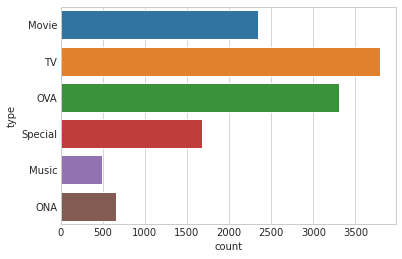

In [36]:
sns.countplot(y="type", data=anime)

In [37]:
fig = px.pie(anime, values=anime['type'].value_counts().values, names=anime['type'].value_counts().index, title='Anime Type',width=500, height=500)
fig.show()

In [38]:
combined_data = anime.merge(ratings, how='left', on='anime_id')
combined_data.shape

(7814824, 9)

In [39]:
combined_data.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99.0,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152.0,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244.0,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271.0,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278.0,-1.0


Anime with highest reviews:

In [40]:
most_reviewed = combined_data.groupby('name')['user_id'].count().sort_values(ascending=False).head(15).reset_index()
most_reviewed

,name,user_id
0,Death Note,39340
1,Sword Art Online,30583
2,Shingeki no Kyojin,29584
3,Code Geass: Hangyaku no Lelouch,27718
4,Elfen Lied,27506
5,Angel Beats!,27183
6,Naruto,25925
7,Fullmetal Alchemist,25032
8,Fullmetal Alchemist: Brotherhood,24574
9,Toradora!,24283


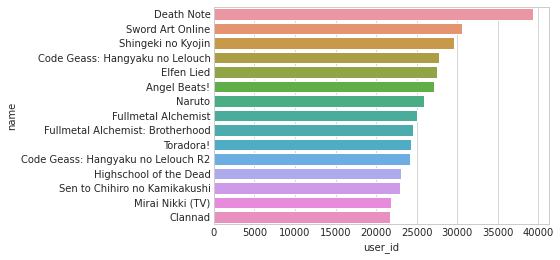

In [41]:
sns.barplot(y='name', x="user_id", data=most_reviewed);

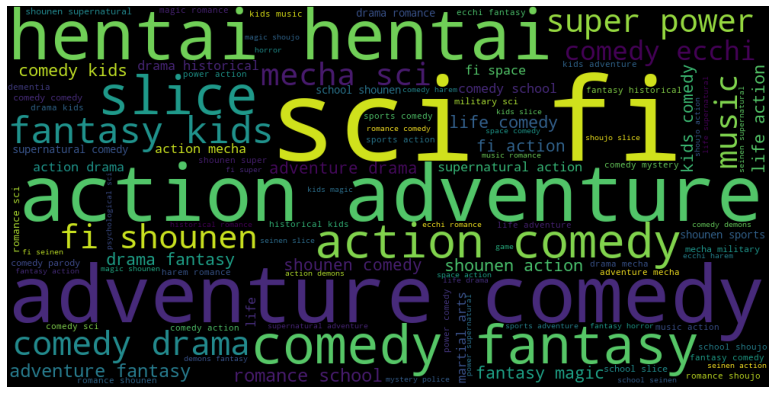

In [42]:
categories = ''
stopwords = set(STOPWORDS)
for val in anime['genre']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    categories += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 500, stopwords = stopwords, min_font_size = 10).generate(categories)
                    
plt.figure(figsize = (14, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# RATING VISUALIZATION

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



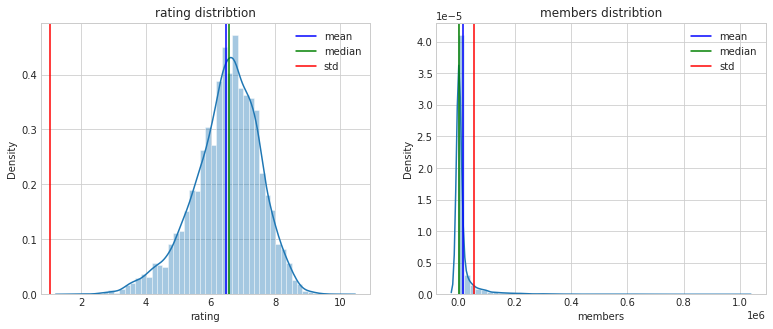

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

fig=plt.figure(figsize=(13,5))
for i,j in zip(anime[['rating','members']].columns,range(3)):
    ax=fig.add_subplot(1,2,j+1)
    sns.distplot(anime[i],ax=ax)
    plt.axvline(anime[i].mean(),label='mean',color='blue')
    plt.axvline(anime[i].median(),label='median',color='green')
    plt.axvline(anime[i].std(),label='std',color='red')
    plt.title('{} distribtion'.format(i))
    plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



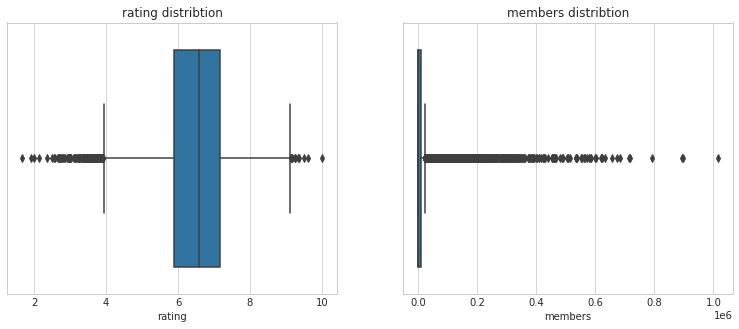

In [44]:
fig=plt.figure(figsize=(13,5))
for i,j in zip(anime[['rating','members']].columns,range(3)):
    ax=fig.add_subplot(1,2,j+1)
    sns.boxplot(i,data=anime,ax=ax)
    plt.title('{} distribtion'.format(i))
plt.show()